# **GSOC CERN-HSF GNN Tracking Qualification Task Using Python File**

##Installing requirements

In [3]:
!pip install pyg_lib torch_scatter torch_sparse -f https://data.pyg.org/whl/torch-1.13.1+cu116.html
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 45.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 KB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 34.7 MB/s eta 0:00:00
  Created wheel for torch-geometric: filename=torch_geometric-2.2.0-py3-none-any.whl size=773302 sha256=2e1498a9f35ddd53d442fdf60a127a92066aafe0ea0765e059eba26ba5507b7d
  Stored in directory: /root/.cache/pip/wheels/59/a3/20/198928106d3169865ae73afcbd3d3d1796cf6b429b55c65378
Successfully built 

Moving to directory containing data on my system

In [1]:
cd drive/MyDrive/GSOC/CERN-HSF

/content/drive/MyDrive/GSOC/CERN-HSF


## Importing Required Libraries

In [2]:
import cern
from pathlib import Path
import torch
import torch.nn as nn

## Loading the Dataset

### Creating Datasets for Train-Val-Test

In [3]:
dataset = cern.MyDataset

In [4]:
train_dataset = dataset(Path("./"), split = 'train')
val_dataset = dataset(Path("./"), split = 'val')
test_dataset = dataset(Path("./"), split = 'test')

In [7]:
# Number of Graphs in each split
print(len(train_dataset), len(val_dataset), len(test_dataset))

7996 1000 1000


### Getting Train-Val-Test Loaders

In [8]:
train_loader, val_loader, test_loader = cern.get_data_loaders(train_dataset, val_dataset, test_dataset, batch_size=32)

### Setting the Device

In [9]:
device = cern.get_device()
print(device)

cuda


### Calculating weights for both labels to handle Data-Imbalance

In [10]:
weights = cern.calculate_class_weights(train_loader)

100%|██████████| 250/250 [25:12<00:00,  6.05s/it]


Frequency of class 0 : 0.8233693433522747, Assigned weight : 3.870463932385163e-08
Frequency of class 1 : 0.17663065664772526, Assigned weight : 1.8042288960248145e-07


## Model
### Calling the Model

In [11]:
model = cern.EdgeClassifier(num_node_features=6, num_edge_features=4, hidden_channels=64, num_classes=2)
model = model.to(device)

In [12]:
print(model)

EdgeClassifier(
  (conv1): GCNConv(6, 64)
  (conv2): GCNConv(64, 64)
  (lin1): Linear(in_features=132, out_features=64, bias=True)
  (lin2): Linear(in_features=64, out_features=2, bias=True)
)


### Model Training and Evalutation

In [13]:
# Training and Validation
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(weight=weights)

for epoch in range(20):

  print(f'Epoch: {epoch+1}')

  model, loss = cern.train(model, device, train_loader, optimizer, criterion)
  cern.evaluate(model, device, val_loader)

Epoch: 1


100%|██████████| 250/250 [00:17<00:00, 14.68it/s]


Train Loss : 0.4920
Train Accuracy: 0.805


100%|██████████| 32/32 [03:12<00:00,  6.02s/it]


Validation Accuracy 0.863
Epoch: 2


100%|██████████| 250/250 [00:13<00:00, 18.10it/s]


Train Loss : 0.3943
Train Accuracy: 0.842


100%|██████████| 32/32 [00:01<00:00, 21.02it/s]


Validation Accuracy 0.868
Epoch: 3


100%|██████████| 250/250 [00:14<00:00, 17.63it/s]


Train Loss : 0.3684
Train Accuracy: 0.850


100%|██████████| 32/32 [00:01<00:00, 20.46it/s]


Validation Accuracy 0.879
Epoch: 4


100%|██████████| 250/250 [00:13<00:00, 18.05it/s]


Train Loss : 0.3521
Train Accuracy: 0.865


100%|██████████| 32/32 [00:01<00:00, 20.99it/s]


Validation Accuracy 0.884
Epoch: 5


100%|██████████| 250/250 [00:14<00:00, 17.78it/s]


Train Loss : 0.3391
Train Accuracy: 0.877


100%|██████████| 32/32 [00:01<00:00, 21.16it/s]


Validation Accuracy 0.876
Epoch: 6


100%|██████████| 250/250 [00:14<00:00, 17.76it/s]


Train Loss : 0.3290
Train Accuracy: 0.887


100%|██████████| 32/32 [00:01<00:00, 20.54it/s]


Validation Accuracy 0.887
Epoch: 7


100%|██████████| 250/250 [00:14<00:00, 17.68it/s]


Train Loss : 0.3175
Train Accuracy: 0.893


100%|██████████| 32/32 [00:01<00:00, 19.75it/s]


Validation Accuracy 0.895
Epoch: 8


100%|██████████| 250/250 [00:14<00:00, 17.53it/s]


Train Loss : 0.3016
Train Accuracy: 0.899


100%|██████████| 32/32 [00:01<00:00, 20.34it/s]


Validation Accuracy 0.908
Epoch: 9


100%|██████████| 250/250 [00:14<00:00, 17.80it/s]


Train Loss : 0.2770
Train Accuracy: 0.905


100%|██████████| 32/32 [00:01<00:00, 22.29it/s]


Validation Accuracy 0.908
Epoch: 10


100%|██████████| 250/250 [00:14<00:00, 17.80it/s]


Train Loss : 0.2526
Train Accuracy: 0.909


100%|██████████| 32/32 [00:01<00:00, 21.85it/s]


Validation Accuracy 0.918
Epoch: 11


100%|██████████| 250/250 [00:13<00:00, 17.86it/s]


Train Loss : 0.2337
Train Accuracy: 0.912


100%|██████████| 32/32 [00:01<00:00, 18.98it/s]


Validation Accuracy 0.918
Epoch: 12


100%|██████████| 250/250 [00:13<00:00, 17.86it/s]


Train Loss : 0.2200
Train Accuracy: 0.913


100%|██████████| 32/32 [00:01<00:00, 20.41it/s]


Validation Accuracy 0.915
Epoch: 13


100%|██████████| 250/250 [00:13<00:00, 17.97it/s]


Train Loss : 0.2090
Train Accuracy: 0.913


100%|██████████| 32/32 [00:01<00:00, 21.38it/s]


Validation Accuracy 0.920
Epoch: 14


100%|██████████| 250/250 [00:13<00:00, 18.06it/s]


Train Loss : 0.1998
Train Accuracy: 0.914


100%|██████████| 32/32 [00:01<00:00, 22.27it/s]


Validation Accuracy 0.921
Epoch: 15


100%|██████████| 250/250 [00:13<00:00, 18.26it/s]


Train Loss : 0.1917
Train Accuracy: 0.914


100%|██████████| 32/32 [00:01<00:00, 22.04it/s]


Validation Accuracy 0.920
Epoch: 16


100%|██████████| 250/250 [00:14<00:00, 17.78it/s]


Train Loss : 0.1853
Train Accuracy: 0.915


100%|██████████| 32/32 [00:01<00:00, 20.72it/s]


Validation Accuracy 0.925
Epoch: 17


100%|██████████| 250/250 [00:14<00:00, 17.63it/s]


Train Loss : 0.1797
Train Accuracy: 0.915


100%|██████████| 32/32 [00:01<00:00, 21.57it/s]


Validation Accuracy 0.922
Epoch: 18


100%|██████████| 250/250 [00:14<00:00, 17.75it/s]


Train Loss : 0.1749
Train Accuracy: 0.916


100%|██████████| 32/32 [00:01<00:00, 21.19it/s]


Validation Accuracy 0.929
Epoch: 19


100%|██████████| 250/250 [00:13<00:00, 18.00it/s]


Train Loss : 0.1708
Train Accuracy: 0.916


100%|██████████| 32/32 [00:01<00:00, 21.00it/s]


Validation Accuracy 0.928
Epoch: 20


100%|██████████| 250/250 [00:14<00:00, 17.70it/s]


Train Loss : 0.1670
Train Accuracy: 0.917


100%|██████████| 32/32 [00:01<00:00, 19.48it/s]

Validation Accuracy 0.924


Testing The Model


100%|██████████| 32/32 [03:07<00:00,  5.85s/it]



Results

Testing Accuracy 0.925
F1 score: 0.818
AUCPR: 0.938



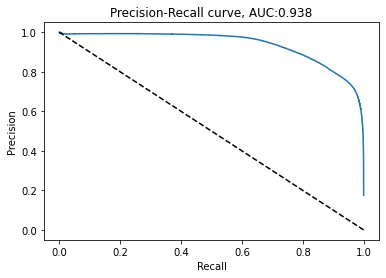

In [14]:
# Testing

acc, f1, precision, recall, area = cern.test(model, device, test_loader)
cern.plot_pr_curve(precision, recall, area)